---
## Clustering Practice <br> <font size=3.4> Dataset:Universities.csv<br><font size=2>Perform Clustering for the University data using Density Based Spatial Clustering of Applications with Noise (DBSCAN) and identify the number of clusters formed and draw inferences.
---

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics

In [11]:
filename= '/Users/Ketan/Data Science/Datasets/Universities.csv'
df = pd.read_csv(filename)
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [12]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])

df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667


## K-Means Clustering

### Checking via Elbow method for optimum number of clusters

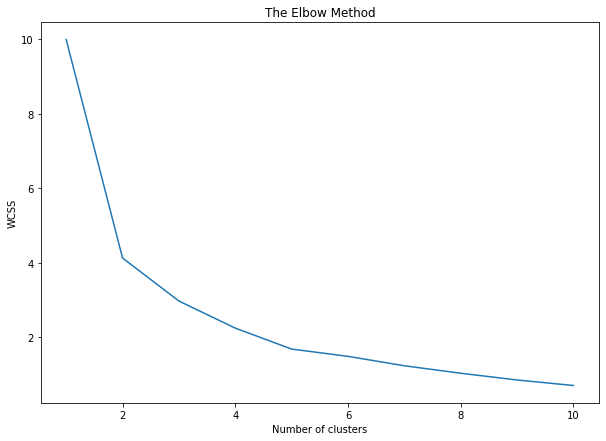

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Confirming the same with Silhouette score

In [16]:
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=42).fit(df_norm).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df_norm,labels,metric="euclidean",sample_size=1000,random_state=42)))

Silhouette score for k(clusters) = 3 is 0.3168544343978183
Silhouette score for k(clusters) = 4 is 0.3367636954459806
Silhouette score for k(clusters) = 5 is 0.3266612607251473
Silhouette score for k(clusters) = 6 is 0.3184776579967329
Silhouette score for k(clusters) = 7 is 0.28541499406761006
Silhouette score for k(clusters) = 8 is 0.272618234351971
Silhouette score for k(clusters) = 9 is 0.23932849803499665
Silhouette score for k(clusters) = 10 is 0.24891654171455496
Silhouette score for k(clusters) = 11 is 0.22618201397945661
Silhouette score for k(clusters) = 12 is 0.21141337796638343


### Hence, we can conclude that optimum no of clusters = 4

In [18]:
model=KMeans(n_clusters=4) 
model.fit(df_norm)
model.labels_

array([0, 2, 3, 3, 3, 0, 0, 3, 0, 2, 0, 3, 3, 1, 0, 1, 0, 1, 3, 3, 3, 3,
       3, 1, 0], dtype=int32)

In [19]:
km = pd.Series(model.labels_) 
df['kclust']= km 
df.iloc[:,1:5].groupby(df.kclust).mean()

,SAT,Top10,Accept,SFRatio
kclust,,,,
0,1356.875000,91.125000,21.500000,10.875000
1,1061.500000,38.750000,70.000000,19.250000
2,1360.000000,87.500000,34.500000,6.500000
3,1258.181818,77.545455,41.727273,12.818182


In [59]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,kclust
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,3
3,Columbia,1310,76,24,12,31510,88,3
4,Cornell,1280,83,33,13,21864,90,3
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,3
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,2


Text(0.5, 0.98, 'Relative comparison of colleges in respective clusters')

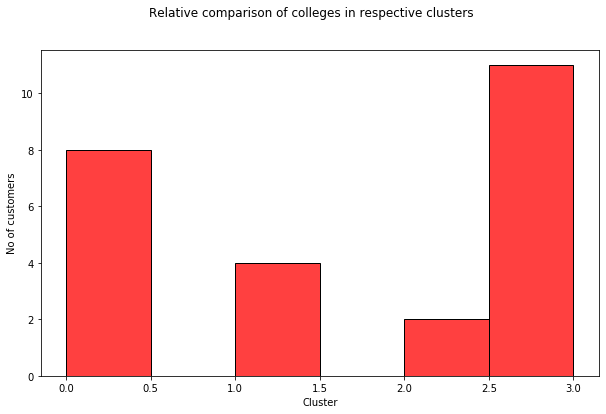

In [30]:
plt.figure(figsize=(10,6))
sns.histplot (x='kclust', data=df, color='red', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('No of customers')
plt.suptitle('Relative comparison of colleges in respective clusters')

([<matplotlib.patches.Wedge at 0x7f9ae7bf3d90>,
 [Text(0.2248575863318331, 1.1787446991902115, 'Cluster 1'),
  Text(-0.9708204196655015, -0.705342266393061, 'Cluster 2'),
  Text(0.6429920818796567, -1.013193556355381, 'Cluster 3'),
  Text(1.1622997670899697, -0.29842796689084344, 'Cluster 4')],
 [Text(0.13116692536023597, 0.6876010745276234, '44.0%'),
  Text(-0.5663119114715425, -0.41144965539595224, '32.0%'),
  Text(0.3750787144297997, -0.591029574540639, '16.0%'),
  Text(0.678008197469149, -0.1740829806863253, '8.0%')])

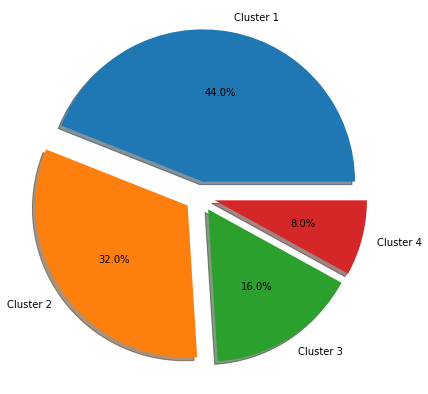

In [51]:
x = df.kclust.value_counts()

cls = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
plt.figure(figsize=(7,7))
plt.pie(x, shadow=True, explode=[0.1,0.1,0.1,0.1], autopct='%1.1f%%', labels=cls)

## Hierarchical Clustering

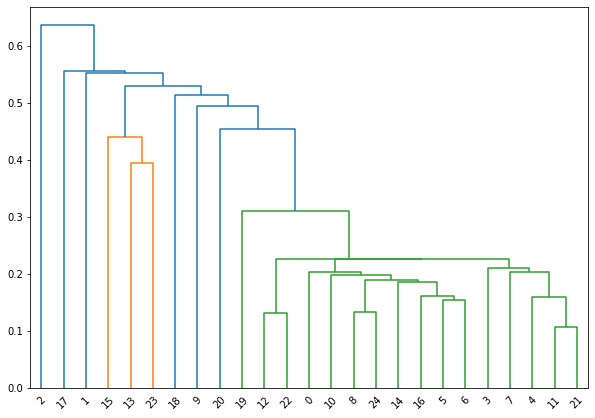

In [65]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

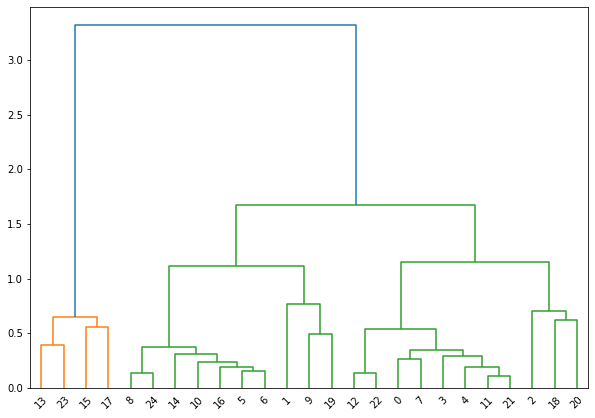

In [68]:
# create dendrogram
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

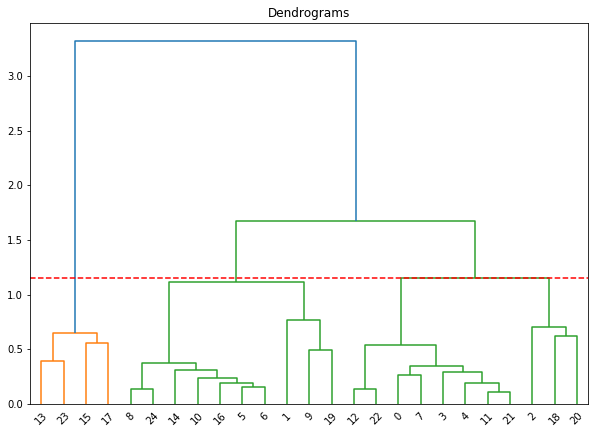

In [57]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.axhline(y=1.15, color='r', linestyle='--')
plt.show()

In [70]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

Clusters.value_counts()

Clusters
0           22
3            1
2            1
1            1
dtype: int64

In [ ]:
Clusters

Text(0.5, 0.98, 'Relative comparison of cities in respective clusters')

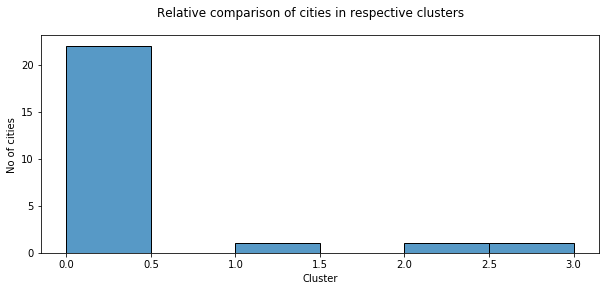

In [75]:
df['hc_clust']= Clusters

plt.figure(figsize=(10,4))
sns.histplot (x='hc_clust', data=df)
plt.xlabel('Cluster')
plt.ylabel('No of cities')
plt.suptitle('Relative comparison of cities in respective clusters')

## Density Based Spatial Clustering of Applications with Noise (DBSCAN)

In [79]:
dbscan = DBSCAN(eps=0.5, min_samples=6)
dbscan.fit(df_norm)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [80]:
dbscan.labels_

array([ 0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
       -1, -1,  0,  0,  0,  0, -1,  0])

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

In [82]:
pd.concat([df,cl],axis=1)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,kclust,hc_clust,cluster
0,Brown,1310,89,22,13,22704,94,0,0,0
1,CalTech,1415,100,25,6,63575,81,2,3,-1
2,CMU,1260,62,59,9,25026,72,3,1,-1
3,Columbia,1310,76,24,12,31510,88,3,0,0
4,Cornell,1280,83,33,13,21864,90,3,0,0
5,Dartmouth,1340,89,23,10,32162,95,0,0,0
6,Duke,1315,90,30,12,31585,95,0,0,0
7,Georgetown,1255,74,24,12,20126,92,3,0,0
8,Harvard,1400,91,14,11,39525,97,0,0,0
9,JohnsHopkins,1305,75,44,7,58691,87,2,0,0
